In [1]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14
import seaborn as sns
Colors = sns.color_palette("viridis", 16).as_hex()
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)

In [28]:
import os

# Where to save the figures

IMAGES_PATH = './images'
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=180):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches='tight')

In [39]:
bg_hiclass = np.loadtxt("./../../hiclass_new/output/file_classbackground.dat")

In [40]:
bg_kgb = np.loadtxt("./../imp/file_check_bg.dat")

# KGB backgrounds

In [41]:
# scale factor and redshift
a_kgb = bg_kgb[:,2]
z_kgb = 1/a_kgb-1

# Conformal Hubble parameter and its derivative 
Hconf_F = bg_kgb[:,3]
Hconf = bg_kgb[:,4]
Hconf_prime_F = bg_kgb[:,5]
Hconf_prime = bg_kgb[:,6]
Hconf_prime_prime_F = bg_kgb[:,7]
Hconf_prime_prime = bg_kgb[:,8]

# 4piG and H0
fourpiG = bg_kgb[:,9]
H0 = bg_kgb[:,10][0]
norm = np.sqrt(2*fourpiG/3)/H0

# alpha parameters and their derivatives
alpha_K_kgb = bg_kgb[:,11]
alpha_B_kgb = bg_kgb[:,12]
alpha_K_prime_kgb = bg_kgb[:,13]
alpha_B_prime_kgb = bg_kgb[:,14]

# dark energy density and pressure and their derivatives
rho_smg_kgb = bg_kgb[:,16]
p_smg_kgb = bg_kgb[:,17]
rho_smg_prime_kgb = bg_kgb[:,18]
p_smg_prime_kgb = bg_kgb[:,19]

H_hiclass =  bg_kgb[:,25]

In [43]:
cs2 = (3*(rho_smg_kgb + p_smg_kgb) ) / (
    alpha_K_kgb *H_hiclass  * H_hiclass
)
cs2

array([9.99998864e-08, 1.00000543e-07, 1.00000057e-07, 1.00000382e-07,
       9.99997215e-08, 1.00000155e-07, 1.00000173e-07, 9.99999085e-08,
       9.99995532e-08, 1.00000106e-07, 9.99993290e-08, 9.99997697e-08,
       9.99999860e-08, 1.00000182e-07, 9.99996532e-08, 1.00000223e-07,
       9.99996079e-08, 1.00000496e-07, 9.99995022e-08, 9.99995517e-08,
       9.99999968e-08, 1.00000075e-07, 9.99998347e-08, 9.99999827e-08,
       9.99995876e-08, 1.00000080e-07, 1.00000430e-07, 1.00000182e-07,
       1.00000331e-07, 9.99999870e-08, 1.00000097e-07, 1.00000025e-07,
       9.99999388e-08, 9.99999871e-08, 1.00000015e-07, 9.99999660e-08,
       1.00000034e-07, 9.99998995e-08, 1.00000035e-07, 9.99999218e-08,
       1.00000003e-07, 9.99999762e-08, 1.00000059e-07, 9.99999613e-08,
       1.00000018e-07, 1.00000004e-07, 9.99999696e-08, 1.00000030e-07,
       1.00000035e-07, 9.99998822e-08, 1.00000003e-07, 9.99999927e-08,
       1.00000000e-07, 9.99999463e-08, 9.99999295e-08, 1.00000106e-07,
      

In [44]:
print(H0)

d_norm = 3.*(2./3.*fourpiG[0])/(H0 * H0)


Mpl2 = 1/(2*fourpiG[0])
cs2_f =((rho_smg_kgb*d_norm+p_smg_kgb*d_norm)*a_kgb*a_kgb)/(alpha_K_kgb*Hconf**2)
cs2_f 

0.0002253426


array([9.99998765e-08, 1.00000618e-07, 1.00000157e-07, 1.00000391e-07,
       9.99997248e-08, 1.00000131e-07, 1.00000148e-07, 9.99999030e-08,
       9.99995036e-08, 1.00000102e-07, 9.99992637e-08, 9.99997633e-08,
       1.00000024e-07, 1.00000200e-07, 9.99996442e-08, 1.00000153e-07,
       9.99995723e-08, 1.00000456e-07, 9.99995537e-08, 9.99995634e-08,
       9.99999911e-08, 1.00000122e-07, 9.99998007e-08, 1.00000039e-07,
       9.99995510e-08, 1.00000113e-07, 1.00000362e-07, 1.00000191e-07,
       1.00000323e-07, 1.00000030e-07, 1.00000063e-07, 1.00000001e-07,
       9.99999965e-08, 1.00000017e-07, 9.99999340e-08, 9.99999295e-08,
       1.00000025e-07, 9.99999635e-08, 1.00000067e-07, 9.99999537e-08,
       1.00000032e-07, 9.99999986e-08, 1.00000104e-07, 9.99999142e-08,
       1.00000071e-07, 9.99999360e-08, 1.00000038e-07, 9.99999771e-08,
       9.99999702e-08, 9.99998192e-08, 1.00000068e-07, 1.00000037e-07,
       9.99999278e-08, 9.99999504e-08, 9.99999319e-08, 1.00000102e-07,
      

In [45]:
fac = fourpiG[0]
fac

0.3755194

In [46]:
rho_smg_kgb

array([1.394711e-07, 1.378243e-07, 1.361968e-07, 1.345886e-07,
       1.329993e-07, 1.314288e-07, 1.298768e-07, 1.283431e-07,
       1.268275e-07, 1.253299e-07, 1.238498e-07, 1.223873e-07,
       1.209420e-07, 1.195138e-07, 1.181024e-07, 1.167077e-07,
       1.153294e-07, 1.139675e-07, 1.126215e-07, 1.112915e-07,
       1.099772e-07, 1.086784e-07, 1.073949e-07, 1.061266e-07,
       1.048732e-07, 1.036347e-07, 1.024108e-07, 1.012013e-07,
       1.000061e-07, 9.882498e-08, 9.765783e-08, 9.650446e-08,
       9.536470e-08, 9.423841e-08, 9.312541e-08, 9.202555e-08,
       9.093868e-08, 8.986464e-08, 8.880328e-08, 8.775445e-08,
       8.671801e-08, 8.569380e-08, 8.468169e-08, 8.368152e-08,
       8.269317e-08, 8.171648e-08, 8.075132e-08, 7.979756e-08,
       7.885506e-08, 7.792368e-08, 7.700330e-08, 7.609379e-08,
       7.519501e-08, 7.430684e-08, 7.342915e-08, 7.256183e-08,
       7.170473e-08])

# hiclass backgrounds

In [47]:
# scale factor and redshift
z_hiclass = bg_hiclass[:,0]
a_hiclass = 1/(1+z_hiclass)

# Hubble parameter and its derivative 
H_hiclass = bg_hiclass[:,3]
H_prime_hiclass = bg_hiclass[:,4]
H_prime_prime_hiclass = bg_hiclass[:,32]

# alpha parameters and their derivatives
alpha_K_hiclass = bg_hiclass[:,25]
alpha_B_hiclass = bg_hiclass[:,26]
alpha_K_prime_hiclass = bg_hiclass[:,35]
alpha_B_prime_hiclass = bg_hiclass[:,36]

# dark energy density and pressure and their derivatives
rho_smg_hiclass = bg_hiclass[:,19]
p_smg_hiclass = bg_hiclass[:,20]
rho_smg_prime_hiclass = bg_hiclass[:,21]
p_smg_prime_hiclass = bg_hiclass[:,22]

# interpolating the abve quantities
a_f = interp1d(z_hiclass,a_hiclass,kind = 'cubic')
H_f = interp1d(z_hiclass,H_hiclass,kind = 'cubic')

H_prime_f = interp1d(z_hiclass,H_prime_hiclass,kind = 'cubic')
H_prime_prime_f = interp1d(z_hiclass,H_prime_prime_hiclass,kind = 'cubic')

alpha_K_hiclass_f = interp1d(z_hiclass,alpha_K_hiclass,kind = 'cubic')
alpha_B_hiclass_f = interp1d(z_hiclass,alpha_B_hiclass,kind = 'cubic')
alpha_K_prime_hiclass_f = interp1d(z_hiclass,alpha_K_prime_hiclass,kind = 'cubic')
alpha_B_prime_hiclass_f = interp1d(z_hiclass,alpha_B_prime_hiclass,kind = 'cubic')

rho_smg_hiclass_f = interp1d(z_hiclass,rho_smg_hiclass,kind = 'cubic')
p_smg_hiclass_f = interp1d(z_hiclass,p_smg_hiclass,kind = 'cubic')
rho_smg_prime_hiclass_f = interp1d(z_hiclass,rho_smg_prime_hiclass,kind = 'cubic')
p_smg_prime_hiclass_f = interp1d(z_hiclass,p_smg_prime_hiclass,kind = 'cubic')


## conformal huble time in terms of physical huble time (3rd formula)
Hconf_hiclass = (norm[0]* H_f(z_kgb)*a_f(z_kgb))        

Hconf_prime_hiclass = (norm[0] ** 2) * (a_f(z_kgb) ** 2) * (
    (H_f(z_kgb) ** 2)
) + (norm[0] ** 2) * a_f(z_kgb) * H_prime_f(z_kgb)

Hconf_prime_prime_hiclass = (
    2 * (a_f(z_kgb) ** 3) * (H_f(z_kgb) ** 3)
    + 3 * (a_f(z_kgb) ** 2) * H_f(z_kgb) * H_prime_f(z_kgb)
    + a_f(z_kgb) * H_prime_prime_f(z_kgb)
)*norm**3




In [48]:
rho_smg_hiclass

array([5.53589562e-04, 5.52432285e-04, 5.51277427e-04, ...,
       3.50726719e-08, 3.49989885e-08, 3.49291400e-08])

In [49]:
cs2 = (3*(rho_smg_hiclass + p_smg_hiclass) ) / (
    alpha_K_hiclass *H_hiclass  * H_hiclass
)
cs2

array([1.00000000e-07, 1.00000000e-07, 1.00000000e-07, ...,
       1.00000000e-07, 1.00000000e-07, 9.99999643e-08])

In [50]:
H0_squared = H_f(0)**2

In [51]:
cs2 = (3*H0_squared*(rho_smg_hiclass/H0_squared + p_smg_hiclass/H0_squared) ) / (
    alpha_K_hiclass *H_hiclass  * H_hiclass
)
cs2

array([1.00000000e-07, 1.00000000e-07, 1.00000000e-07, ...,
       1.00000000e-07, 1.00000000e-07, 9.99999643e-08])

# $\mathcal{H}, \mathcal{H}', \mathcal{H}''$ checks

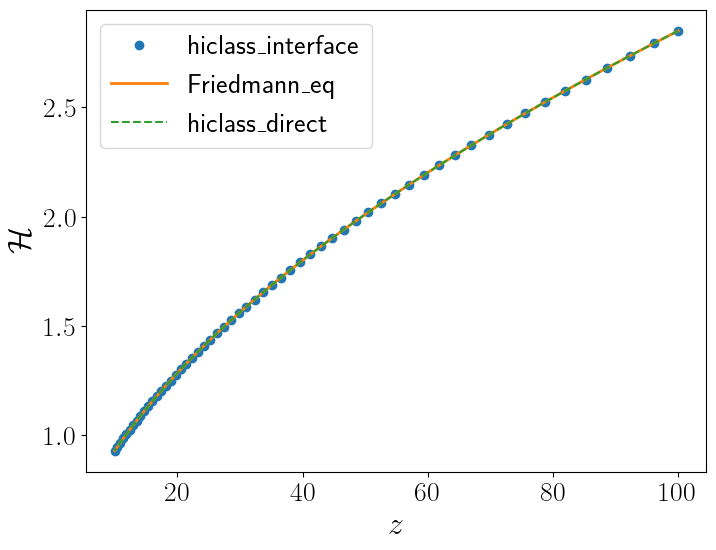

In [52]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,Hconf,"o",ms = 6, label = "hiclass_interface")
ax.plot(z_kgb,Hconf_F,"-",lw = 2, label = "Friedmann_eq")
ax.plot(z_kgb,Hconf_hiclass,"--",lw = 1.5, label = "hiclass_direct")

#ax.set_xscale('log')
ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\mathcal{H}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

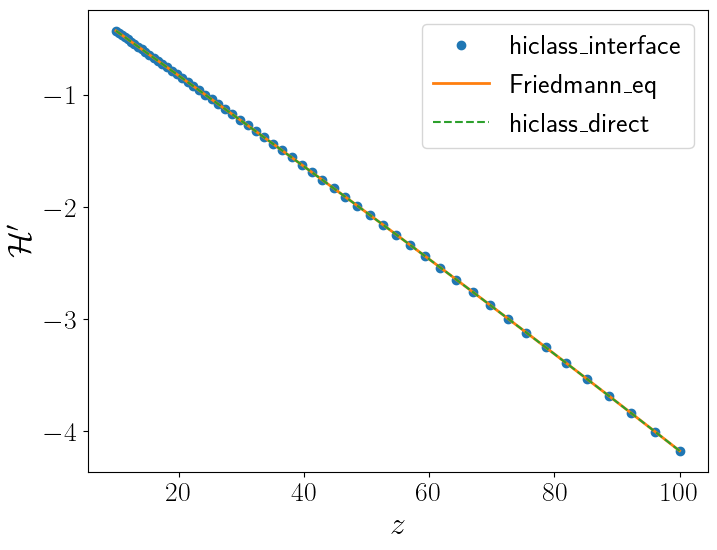

In [53]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,Hconf_prime,"o",ms = 6, label = "hiclass_interface")
ax.plot(z_kgb,Hconf_prime_F,"-",lw = 2, label = "Friedmann_eq")
ax.plot(z_kgb,Hconf_prime_hiclass,"--",lw = 1.5, label = "hiclass_direct")

#ax.set_xscale('log')
ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\mathcal{H}'$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

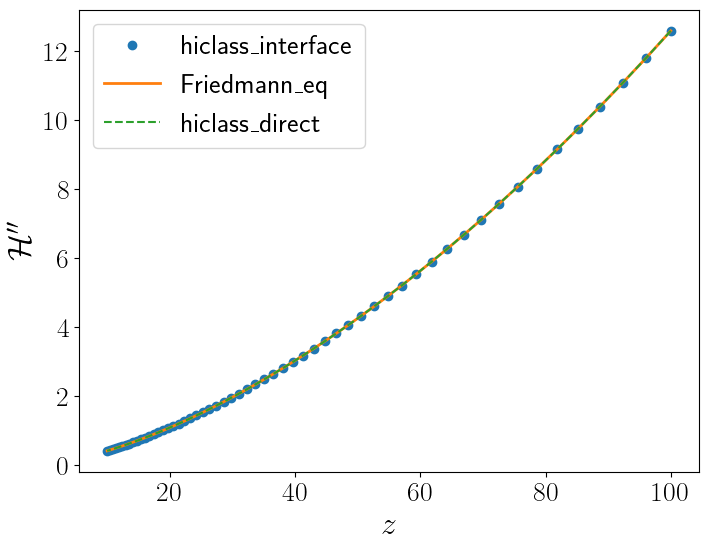

In [54]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,Hconf_prime_prime,"o",ms = 6, label = "hiclass_interface")
ax.plot(z_kgb,Hconf_prime_prime_F,"-",lw = 2, label = "Friedmann_eq")
ax.plot(z_kgb,Hconf_prime_prime_hiclass,"--",lw = 1.5, label = "hiclass_direct")

ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\mathcal{H}''$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

# $\alpha_\mathrm{K}, \alpha_\mathrm{B}, \alpha^\prime_\mathrm{K}, \alpha^{\prime}_\mathrm{B}$ checks

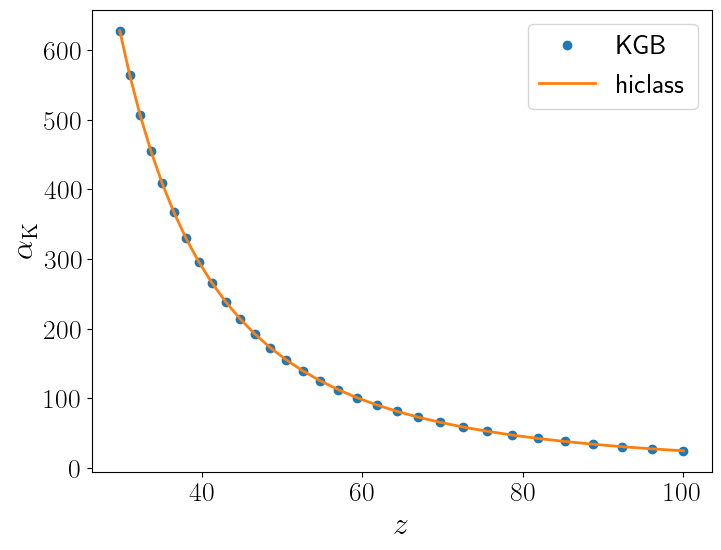

In [11]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,alpha_K_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,alpha_K_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")
# ax.plot(z_hiclass,alpha_K_hiclass,"-",lw = 2, label = "hiclass")

# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(0,200)
ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\alpha_\mathrm{K}$", fontsize= 23)

ax.legend(fontsize = 20)


ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

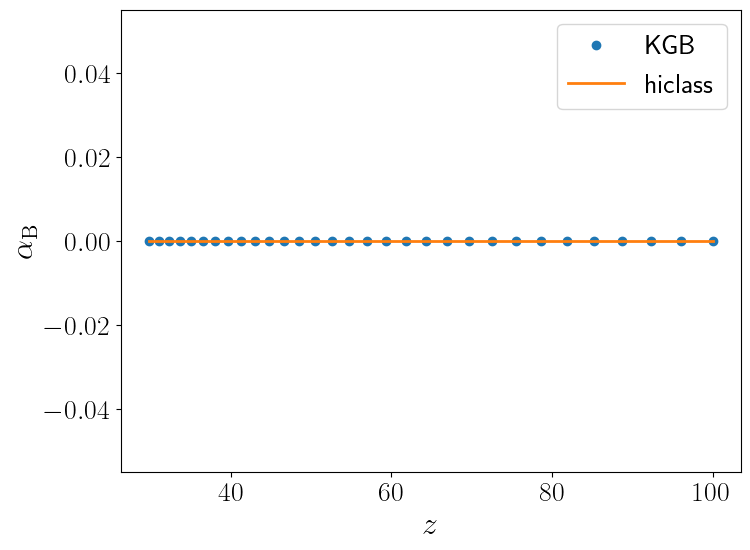

In [12]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,alpha_B_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,alpha_B_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")


ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\alpha_\mathrm{B}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

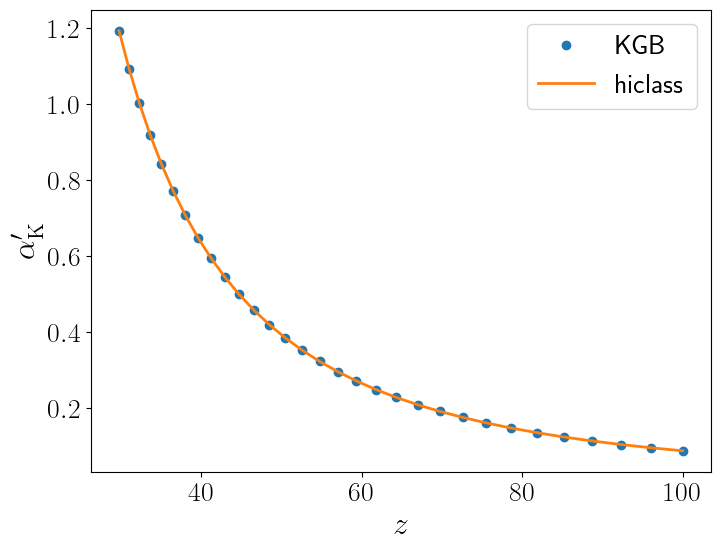

In [13]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,alpha_K_prime_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,alpha_K_prime_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")
# ax.plot(z_hiclass,alpha_K_prime_hiclass,"-",lw = 2, label = "hiclass")

# ax.set_xscale('log')
ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\alpha^{\prime}_\mathrm{K}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

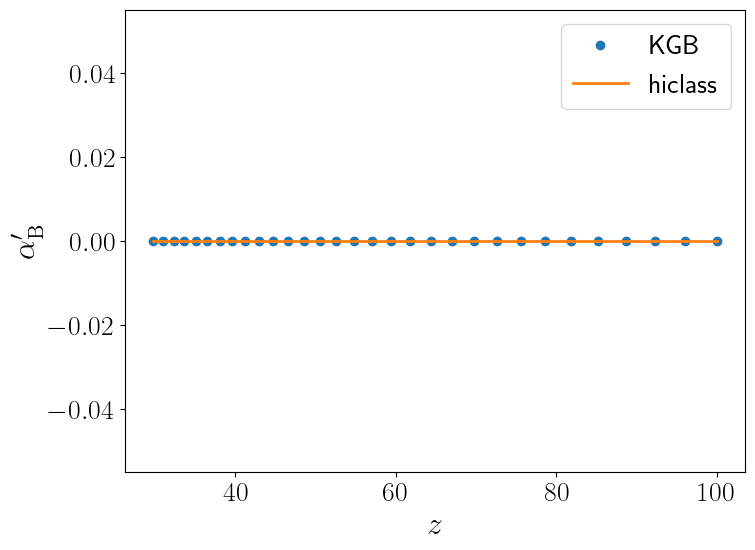

In [14]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,alpha_B_prime_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,alpha_B_prime_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")


ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\alpha^{\prime}_\mathrm{B}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

# $\rho_\mathrm{smg}, \rho^{\prime}_\mathrm{smg}, P_\mathrm{smg}, P^{\prime}_\mathcal{smg}$ checks

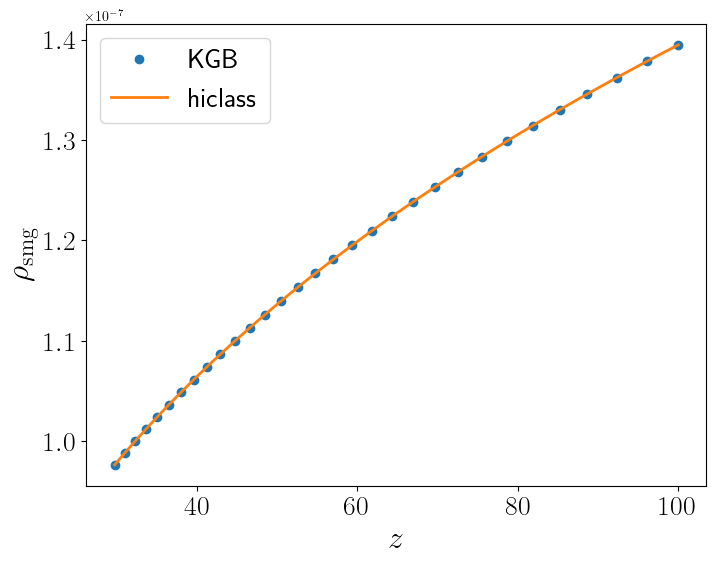

In [15]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,rho_smg_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,rho_smg_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")


ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\rho_\mathrm{smg}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

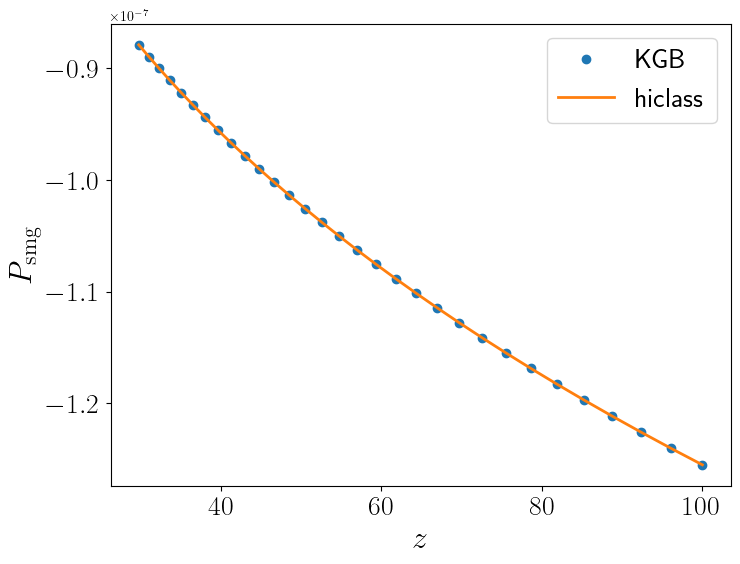

In [16]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,p_smg_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,p_smg_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")


ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$P_\mathrm{smg}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

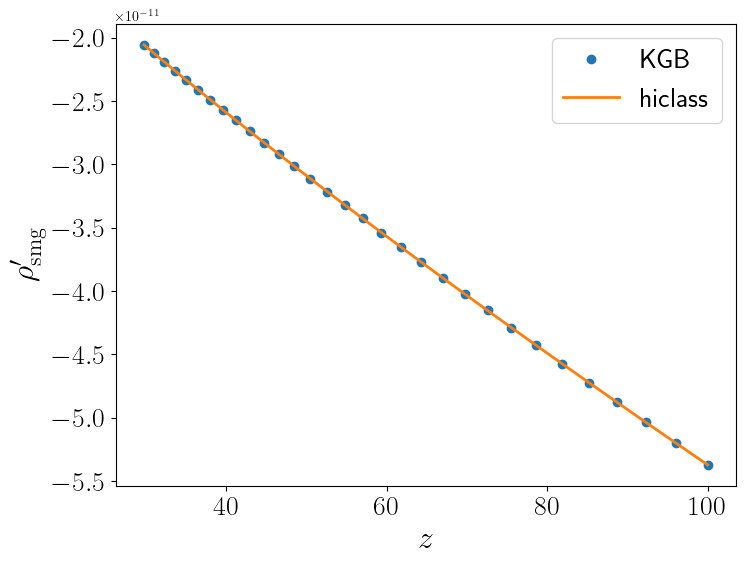

In [17]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,rho_smg_prime_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,rho_smg_prime_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")


ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$\rho^{\prime}_\mathrm{smg}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

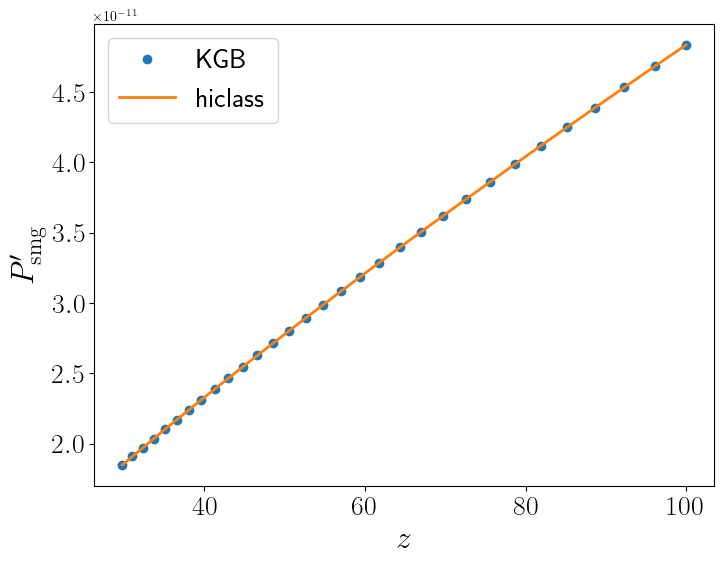

In [18]:
fig, ax = plt.subplots(1,1,figsize = (8,6),sharex=True)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}


ax.plot(z_kgb,p_smg_prime_kgb,"o",ms = 6, label = "KGB")
ax.plot(z_kgb,p_smg_prime_hiclass_f(z_kgb),"-",lw = 2, label = "hiclass")


ax.set_xlabel("$z$",fontsize= 23)
ax.set_ylabel(r"$P^{\prime}_\mathrm{smg}$", fontsize= 23)

ax.legend(fontsize = 20)

ax.tick_params(axis='both',       
               which='major',     
               labelsize=20)   

# Power spectra at z = 100

## KGB

In [19]:
k_pi_kgb, PP_pi_kgb = np.loadtxt("./../output/pk_test_pi_k.dat", usecols=[0,1], unpack = True)  
k_zeta_kgb, PP_zeta_kgb = np.loadtxt("./../output/pk_test_zeta.dat", usecols=[0,1], unpack = True)  

## hiclass

In [20]:
tk_hiclass = np.loadtxt("./../../hiclass_new/output/file_classtk.dat")


As = 2.215 * 1.0e-9
h = 0.67556
kp = 0.05 / h
ns = 0.9619


k_hiclass = tk_hiclass[:,0]
vx_smg = tk_hiclass[:,5]
vx_smg_prime = tk_hiclass[:,6]
h_prime = tk_hiclass[:,11]
eta_prime = tk_hiclass[:,13]
psi_hiclass = tk_hiclass[:,9]

# $\pi$ power spectrum

In [21]:
##### construction dimensionless power spectrum in hiclass

Normlization = As*(k_hiclass/kp)**(ns-1.)

alpha = (h_prime + 6 * eta_prime)/ (2*k_hiclass* h* h)
pi_new = -vx_smg + alpha
pk_pi_hi = Normlization * (pi_new **2)

pk_dimless_hiclass = pk_pi_hi * H0* H0/(k_hiclass**2)

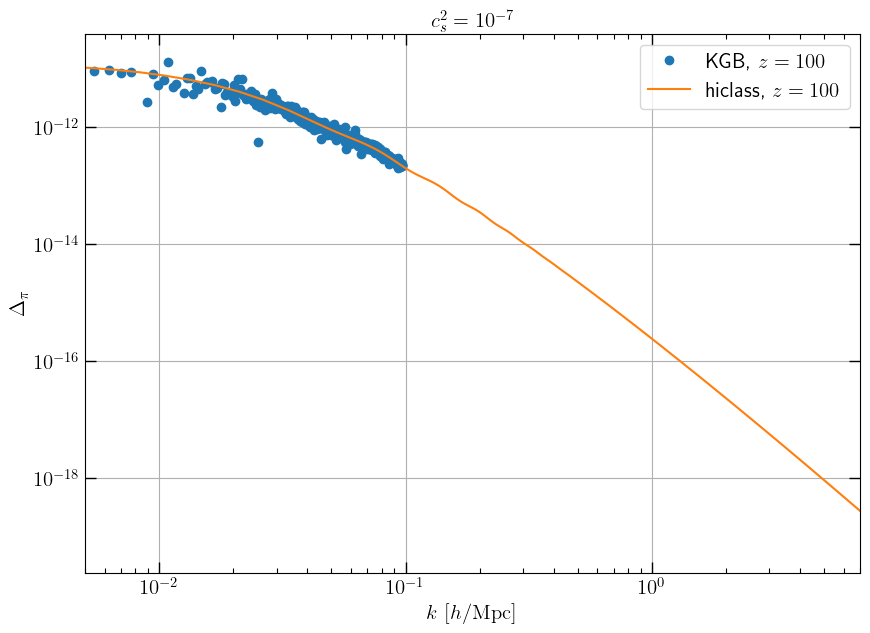

In [22]:
fig, ax = plt.subplots(1,1,figsize = (10,7),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.012, wspace=0.0)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}
#Normlization = As*(kk/kp)**(ns-1.)

####### KGB



ax.plot(k_pi_kgb[:460],PP_pi_kgb[:460],'o', label = "KGB, $z=100$")

ax.plot(k_hiclass,pk_dimless_hiclass,'-', label = "hiclass, $z=100$")


    
    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$k~ [h/\mathrm{Mpc}]$",fontsize = 15)
ax.set_ylabel(r"$\Delta_{\pi}$",fontsize = 15)
plt.xlim(5.e-3,7)
#     plt.ylim(1.e-11,3.e-6)
ax.grid()

ax.tick_params('both', length=8, width=1, which='major')
ax.tick_params('both', length=3.5, width=0.8, which='minor')
ax.tick_params(direction="in", which = 'major',labelsize=15)
ax.tick_params(direction="in", which = 'minor')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

    
ax.set_title('$c_s^2 = 10^{-7}$',fontsize = 15)
ax.legend(fontsize = 15)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 15}

#save_fig("pi_z100")

## $\zeta$ power spectrum

In hiclass, we first have to write down $\pi'$ in Newtonian gauge using 
$$
\pi'_\textrm{Newt} = \pi'_\textrm{Synch} + \alpha' = -(vx\_prime\_smg) + \alpha'
$$
where $\alpha'$ is given by
$$
\alpha' = \Psi - \mathcal{H}\alpha
$$
then we can use the following formula to obtain $\zeta$
$$
\zeta = \pi'_\textrm{Newt}+\mathcal{H}\pi_\textrm{Newt}-\Psi
$$

In [23]:
# constructing zeta in hiclass

Hconf_hiclass = H_hiclass * a_hiclass
f_Hconf_hi = interp1d(z_hiclass ,H_hiclass* a_hiclass)

alpha_prime = psi_hiclass - f_Hconf_hi(100)*alpha
pi_prime_hi = -vx_smg_prime + alpha_prime
zeta_hi = pi_prime_hi + f_Hconf_hi(100)*pi_new  - psi_hiclass

pk_zeta_hiclass = Normlization * (zeta_hi**2)

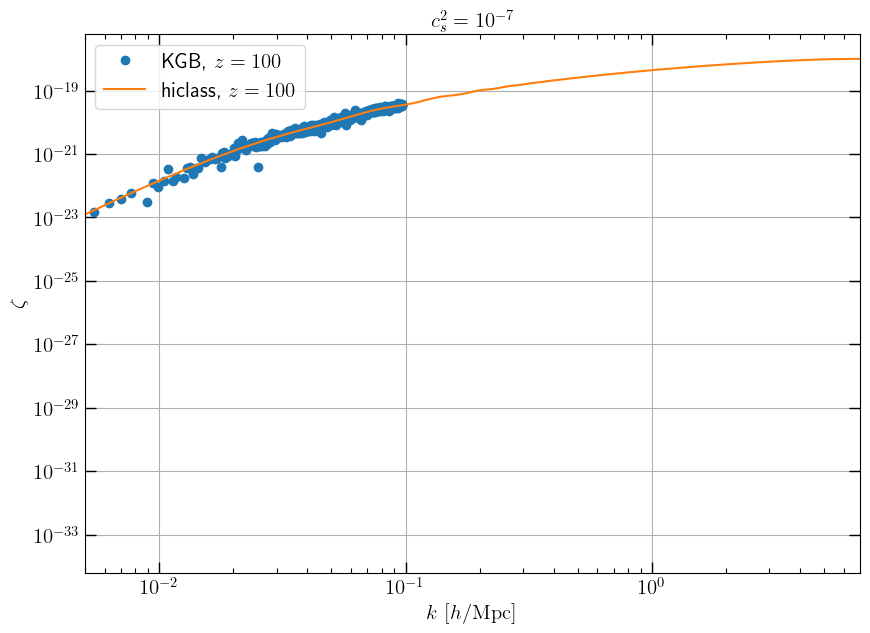

In [24]:
fig, ax = plt.subplots(1,1,figsize = (10,7),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.012, wspace=0.0)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}
#Normlization = As*(kk/kp)**(ns-1.)

####### KGB



ax.plot(k_pi_kgb[:460],PP_zeta_kgb[:460],'o', label = "KGB, $z=100$")
ax.plot(k_hiclass,pk_zeta_hiclass ,'-', label = "hiclass, $z=100$")


    
    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$k~ [h/\mathrm{Mpc}]$",fontsize = 15)
ax.set_ylabel(r"$\zeta$",fontsize = 15)
plt.xlim(5.e-3,7)
#     plt.ylim(1.e-11,3.e-6)
ax.grid()

ax.tick_params('both', length=8, width=1, which='major')
ax.tick_params('both', length=3.5, width=0.8, which='minor')
ax.tick_params(direction="in", which = 'major',labelsize=15)
ax.tick_params(direction="in", which = 'minor')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

    
ax.set_title('$c_s^2 = 10^{-7}$',fontsize = 15)
ax.legend(fontsize = 15)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 15}


# PYTHON WRAPPER hiclass

In [3]:
from configparser import ConfigParser
from itertools import chain

#folder_name = '../k-evolution_devel-k-evolution-/imp'
folder_name = 'output'

parser = ConfigParser()
with open(f"./../{folder_name}/file_classparameters.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)

h = float(parser.get("top", "h"))
Omega_b = float(parser.get("top", "Omega_b"))/(h**2)
Omega_cdm = float(parser.get("top", "Omega_cdm"))/(h**2)
#m_ncdm = float(parser.get("top", "m_ncdm"))
n_s = float(parser.get("top", "n_s"))
A_s = float(parser.get("top", "A_s"))
gravity_model = (parser.get("top", "gravity_model"))


# Extract and parse the 'parameters_smg' string
parameters_smg_str = parser.get("top", "parameters_smg")
parameters_smg_list = parameters_smg_str.split(',')



if len(parameters_smg_list) < 2:
    
    raise ValueError("parameters_smg must contain at least two values: alpha_k and alpha_b.")

# Convert the first two parameters to floats
alpha_K_hat = float(parameters_smg_list[0].strip())
alpha_B_hat = float(parameters_smg_list[1].strip())


# Extract and parse the 'parameters_smg' string
expansion_smg_str = parser.get("top", "expansion_smg")
expansion_smg_list = expansion_smg_str.split(',')

Omega_smg = float(expansion_smg_list[0].strip())
w0 = float(expansion_smg_list[1].strip())
wa = float(expansion_smg_list[2].strip())

# Function to format numbers for LaTeX (reusing the previous function)
def format_scientific_latex(number):
    mantissa, exponent = f"{number:.1e}".split('e')
    exponent = exponent.lstrip('+').lstrip('0') or '0'
    return f"{mantissa} \\times 10^{{{exponent}}}"

# Format the alpha values
alpha_K_hat_latex = format_scientific_latex(alpha_K_hat)

# reading the redshifts

z = []

with open(f'./../{folder_name}/file_settings_used.ini', 'r') as f:
    for line in f:
        if line.startswith('Pk redshifts'):
            # Extract the part after '=' and split by commas
            redshifts_string = line.split('=')[1].split('#')[0].strip()  # Remove comments after #
            z = [float(x.strip()) for x in redshifts_string.split(',')]  # Parse as floats
            
with open(f"./../{folder_name}/file_settings_used.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)


boxsize = float(parser.get("top", "boxsize"))
Ngrid = float(parser.get("top", "Ngrid"))

nKe_numsteps   = float(parser.get("top", "n_kgb_numsteps"))
Courant_factor = float(parser.get("top", "Courant factor"))

redshifts = z



for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    # Load data using the formatted `file_index`
    data["kgb_ev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_pi_k.dat"
    )

    kk_kgb = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 0]


colors = sns.color_palette("gist_ncar", 16).as_hex()


In [5]:
from classy import Class
kk = np.logspace(-4,np.log10(10),1000) # k in h/Mpc
#kk= kk_kgb


M_lin7_hi = Class()
M_lin4_hi = Class()

k_pivot = 0.05
kp = k_pivot

linear7_hi = {
    "Omega_smg": -1,
    "Omega_Lambda": 0,
    "Omega_fld": 0,
    "h": 0.67556,
    "omega_b": 0.022032,
    "omega_cdm": 0.12038,
    "A_s": 2.215e-9,
    "n_s": 0.9619,
    "z_max_pk": 100,
    "tau_reio": 0.05430842,
    "N_ur": 3.046,
    "gravity_model": gravity_model,
    "parameters_smg": f"{alpha_K_hat}, {alpha_B_hat}, 0, 0, 1",
    "extra metric transfer functions":"y",
    "expansion_model": "w0wa",
    "expansion_smg": f"{Omega_smg},{w0},{wa}",
    "output": "dTk,vTk,mPk",
#     "use_ppf":"no",
    "P_k_max_1/Mpc": 130,
}
linear4_hi = linear7_hi.copy()
linear4_hi["parameters_smg"] = f"1, 0, 0, 0, 1"

M_lin7_hi.set(linear7_hi)
M_lin7_hi.compute()

M_lin4_hi.set(linear4_hi)
M_lin4_hi.compute()



As = linear7_hi["A_s"]
ns = linear7_hi["n_s"]
h = M_lin7_hi.h()

Normlization = As*(kk/kp)**(ns-1.)

pk_pi7_hi = [None] * len(z)
pk_pi7_prime_hi = [None] * len(z)
pk_zeta_hi = [None] * len(z)

pk_pi7_hi_synch = [None] * len(z)
alpha_list = [None] * len(z)
pk_pi4_hi = [None] * len(z)


backgrounds_hi = M_lin7_hi.get_background()
a_hi = 1./(1.+ backgrounds_hi['z'])
f_Hconf_hi = interp1d(backgrounds_hi['z'] ,backgrounds_hi['H [1/Mpc]']* a_hi)
H0 = f_Hconf_hi(0)

for zind, z_val in enumerate(z):
  
    Transfers_hi = M_lin7_hi.get_transfer(z_val)
    
    
    alpha = (Transfers_hi['h_prime'] + 6.0 *Transfers_hi['eta_prime'] )/(2.*Transfers_hi['k (h/Mpc)']*Transfers_hi['k (h/Mpc)'] *h*h)
    pi_hi =  -Transfers_hi['vx_smg'] + alpha
    pi_hi_synch = -Transfers_hi['vx_smg']

    alpha_prime = Transfers_hi['psi'] - f_Hconf_hi(z_val)*alpha
    pi_prime_hi = -Transfers_hi['vx_prime_smg'] + alpha_prime
    
    zeta_hi = pi_prime_hi + f_Hconf_hi(z_val)*pi_hi - Transfers_hi['psi']

    
    f_pi_hi = interp1d(Transfers_hi['k (h/Mpc)'],pi_hi,kind = 'cubic')
    f_pi_prime_hi = interp1d(Transfers_hi['k (h/Mpc)'],pi_prime_hi,kind = 'cubic')
    f_zeta_hi = interp1d(Transfers_hi['k (h/Mpc)'],zeta_hi,kind = 'cubic')
    f_pi_hi_synch = interp1d(Transfers_hi['k (h/Mpc)'],pi_hi_synch,kind = 'cubic')

    
    
#     pk_pi7_hi[zind]=((f_pi_hi(kk))**2) * Normlization * ((kk)**2)
#     pk_pi7_prime_hi[zind]=((f_pi_prime_hi(kk))**2) * Normlization 
#     pk_zeta_hi[zind]=((f_zeta_hi(kk))**2) * Normlization
    
    
#     pk_pi7_hi_synch[zind]=((f_pi_hi_synch(kk))**2) * Normlization * ((kk)**2)
    
    
    pk_pi7_hi[zind]=((f_pi_hi(kk))**2) * Normlization * ((kk)**2)
    pk_pi7_prime_hi[zind]=((f_pi_prime_hi(kk))**2) * Normlization 
    pk_zeta_hi[zind]=((f_zeta_hi(kk))**2) * Normlization
    
    
    pk_pi7_hi_synch[zind]=((f_pi_hi_synch(kk))**2) * Normlization * ((kk)**2)

    

# for zind, z_val in enumerate(z):
  
#     Transfers_hi = M_lin4_hi.get_transfer(z_val)
    
#     alpha = (Transfers_hi['h_prime'] + 6.0 *Transfers_hi['eta_prime'] )/(2.*Transfers_hi['k (h/Mpc)']*Transfers_hi['k (h/Mpc)'] *h*h)
#     pi_hi = -Transfers_hi['vx_smg'] + alpha
    
#     f_pi_hi = interp1d(Transfers_hi['k (h/Mpc)'],pi_hi,kind = 'cubic')
    
#     pk_pi4_hi[zind]=((f_pi_hi(kk))**2) * Normlization * ((kk)**2)

In [6]:
backgrounds_hi["c_s^2"]

array([0.01899814, 0.01900049, 0.01899987, ..., 0.00494821, 0.00488434,
       0.00482448])

## KGB implementation

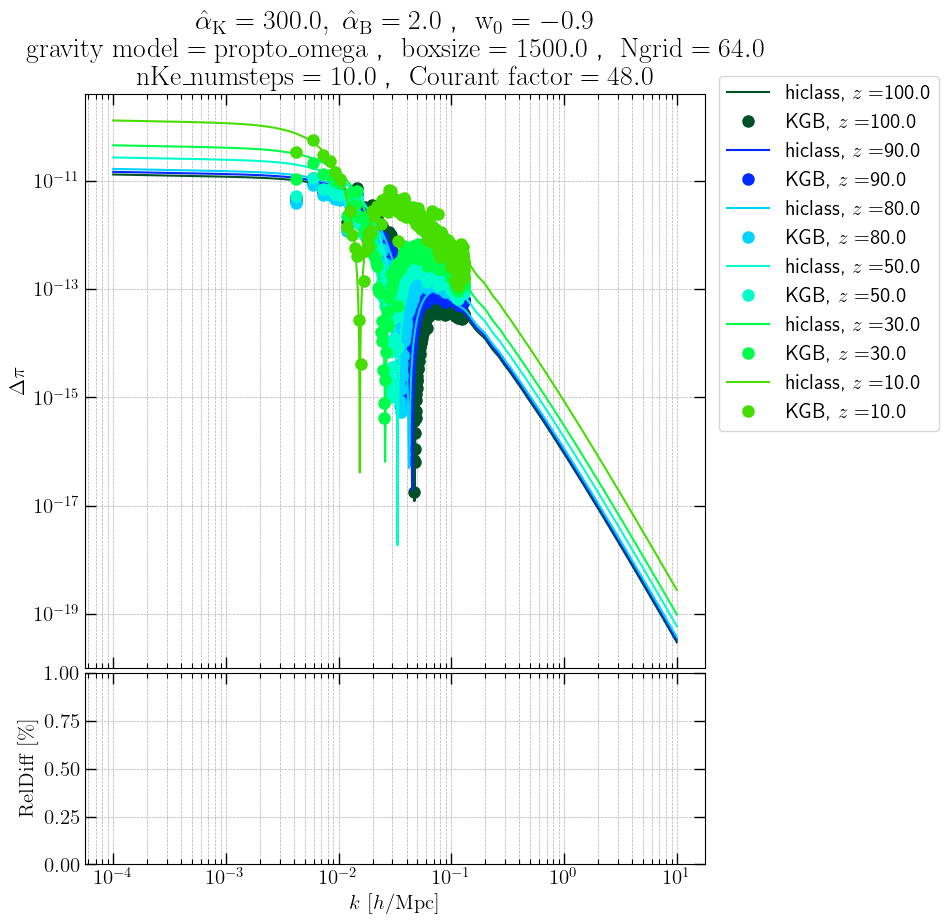

In [8]:
fig, ax = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(8, 10), sharex=True
)
plt.subplots_adjust(hspace=0.012, wspace=0.23)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}
# Normlization*(vx_smg)**2


# # ax.plot(k_pi[:460],PP_pi[:460],'o', label = "KGB, $z=100$")
# for i in range(np.shape(redshifts)[0]):
#     data["kgb_ev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
#         "./../impCluster/pk_00" + str(i) + "_pi_k.dat"
#     )
#     data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
#         "./../impCluster/pk_00" + str(i) + "_zeta.dat"
#     )
#     k = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 0]
#     pk = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 1]

#     ax.plot(
#         kk,
#         pk_pi7_hi[i] * H0 * H0 / ((kk) ** 2),
#         c=colors[i],
#         label="hiclass, $z=$" + str(redshifts[i]),
#     )
#     ax.plot(k[:460], pk[:460], "o", c=colors[i], label="KGB, $z=$" + str(redshifts[i]))

for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit

    # Load data using the formatted `file_index`
    data["kgb_ev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_pi_k.dat"
    )
    data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_zeta.dat"
    )
    k = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 0]
    pk = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 1]

    ax[0].plot(
        kk,
        pk_pi7_hi[i] * H0 * H0 / ((kk) ** 2),"-",
        c=colors[i],
        label="hiclass, $z=$" + str(redshifts[i]),
        markersize=6
    )
    ax[0].plot(
        k[:460], pk[:460], "o", c=colors[i], label="KGB, $z=$" + str(redshifts[i]),
        markersize=8
    )
#     ax[1].plot(
#         k[8:70],
#         (((pk_pi7_hi[i][8:70] * H0 * H0 / ((kk_kgb[8:70]) ** 2))
#         - pk[8:70])/ (pk_pi7_hi[i][8:70] * H0 * H0 / ((kk_kgb[8:70]) ** 2)))*100,
#         "o",
#         c=colors[i],
#         label="KGB, $z=$" + str(redshifts[i]),
#     )


for i in range(2):
    ax[i].set_xscale("log")
    ax[i].set_xlabel("$k~ [h/\mathrm{Mpc}]$", fontsize=15)

    # plt.xlim(5.0e-5, 0.01)
    # plt.ylim(1.e-17,3.e-9)
    ax[i].grid(which="both", axis="both", linestyle="--", linewidth=0.5)

    ax[i].tick_params("both", length=8, width=1, which="major")
    ax[i].tick_params("both", length=3.5, width=0.8, which="minor")
    ax[i].tick_params(direction="in", which="major", labelsize=15)
    ax[i].tick_params(direction="in", which="minor")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")


ax[0].set_yscale("log")
ax[0].set_ylabel(r"$\Delta \pi$", fontsize=15)
ax[1].set_ylabel(r"$\mathrm{Rel Diff}~ [\%]$", fontsize=15)


ax[0].legend(
    fontsize=15,  # Font size
    loc="upper center",  # Place legend above the plot
    bbox_to_anchor=(1.2, 1.05),  # Position outside plot area (x, y relative to axes)
    ncol=1,  # Number of columns
)


# Escape underscores in the gravity_model string
gravity_model = parser.get("top", "gravity_model")
gravity_model = gravity_model.replace("_", r"\_")

ax[0].set_title(
    rf"$\hat{{\alpha}}_{{\mathrm{{K}}}} = {alpha_K_hat},\ \hat{{\alpha}}_{{\mathrm{{B}}}} = {alpha_B_hat}$"
    + "~,~~"
    rf"$\mathrm{{w_0}} = \mathrm{{{w0}}}$"
    + "\n"
    + rf"$\mathrm{{gravity\ model}} = \mathrm{{{gravity_model}}}$"
    + "~,~~"
    rf"$\mathrm{{boxsize}} = \mathrm{{{boxsize}}}$" + "~,~~"
    rf"$\mathrm{{Ngrid}} = \mathrm{{{Ngrid}}}$"
    + "\n"
    + rf"$\mathrm{{nKe\_numsteps}} = \mathrm{{{nKe_numsteps}}}$"
    + "~,~~"
    rf"$\mathrm{{Courant~factor}} = \mathrm{{{Courant_factor}}}$",
    fontsize=20,
)


plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 15}

# save_fig("pi6")

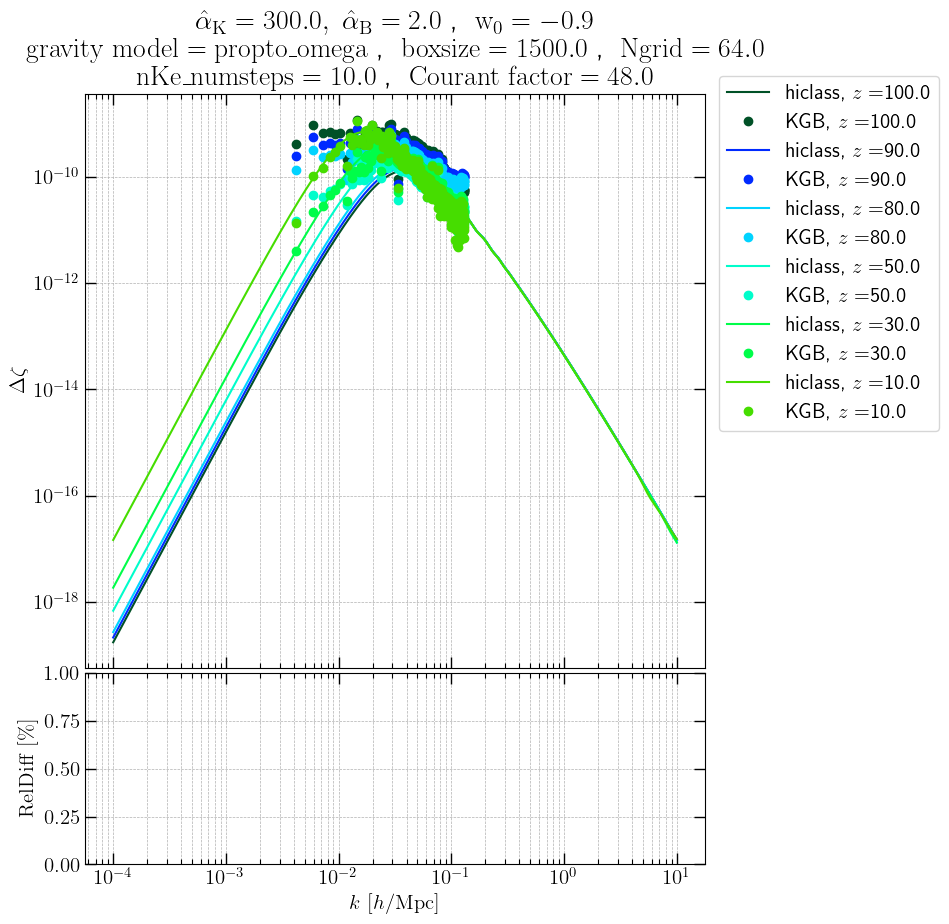

In [9]:
fig, ax = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(8, 10), sharex=True
)
plt.subplots_adjust(hspace=0.012, wspace=0.23)
plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}
# Normlization*(vx_smg)**2


# ax.plot(k_pi[:460],PP_pi[:460],'o', label = "KGB, $z=100$")
for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_zeta.dat"
    )
    k = data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])][:, 0]
    pk = data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])][:, 1]

    ax[0].plot(kk, pk_zeta_hi[i], c=colors[i], label="hiclass, $z=$" + str(redshifts[i]))
    ax[0].plot(k[:460], pk[:460], "o", c=colors[i], label="KGB, $z=$" + str(redshifts[i]))
#     ax[1].plot(
#         k[8:70],
#         ((pk_zeta_hi[i][8:70]- pk[8:70])/ pk_zeta_hi[i][8:70])*100,
#         "o",
#         c=colors[i],
#         label="KGB, $z=$" + str(redshifts[i]),
#     )


for i in range(2):
    ax[i].set_xscale("log")
    ax[i].set_xlabel("$k~ [h/\mathrm{Mpc}]$", fontsize=15)

    # plt.xlim(5.0e-5, 0.01)
    # plt.ylim(1.e-17,3.e-9)
    ax[i].grid(which="both", axis="both", linestyle="--", linewidth=0.5)

    ax[i].tick_params("both", length=8, width=1, which="major")
    ax[i].tick_params("both", length=3.5, width=0.8, which="minor")
    ax[i].tick_params(direction="in", which="major", labelsize=15)
    ax[i].tick_params(direction="in", which="minor")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")


ax[0].set_yscale("log")
ax[0].set_ylabel(r"$\Delta \zeta$", fontsize=15)
ax[1].set_ylabel(r"$\mathrm{Rel Diff}~ [\%]$", fontsize=15)


ax[0].legend(
    fontsize=15,  # Font size
    loc="upper center",  # Place legend above the plot
    bbox_to_anchor=(1.2, 1.05),  # Position outside plot area (x, y relative to axes)
    ncol=1,  # Number of columns
)


ax[0].set_title(
    rf"$\hat{{\alpha}}_{{\mathrm{{K}}}} = {alpha_K_hat},\ \hat{{\alpha}}_{{\mathrm{{B}}}} = {alpha_B_hat}$"
    + "~,~~"
    rf"$\mathrm{{w_0}} = \mathrm{{{w0}}}$"
    + "\n"
    + rf"$\mathrm{{gravity\ model}} = \mathrm{{{gravity_model}}}$"
    + "~,~~"
    rf"$\mathrm{{boxsize}} = \mathrm{{{boxsize}}}$" + "~,~~"
    rf"$\mathrm{{Ngrid}} = \mathrm{{{Ngrid}}}$"
    +"\n" + rf"$\mathrm{{nKe\_numsteps}} = \mathrm{{{nKe_numsteps}}}$" + "~,~~"
    rf"$\mathrm{{Courant~factor}} = \mathrm{{{Courant_factor}}}$",
    fontsize=20,
)


plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 15}

#save_fig("zeta6")

## Cluster simulations

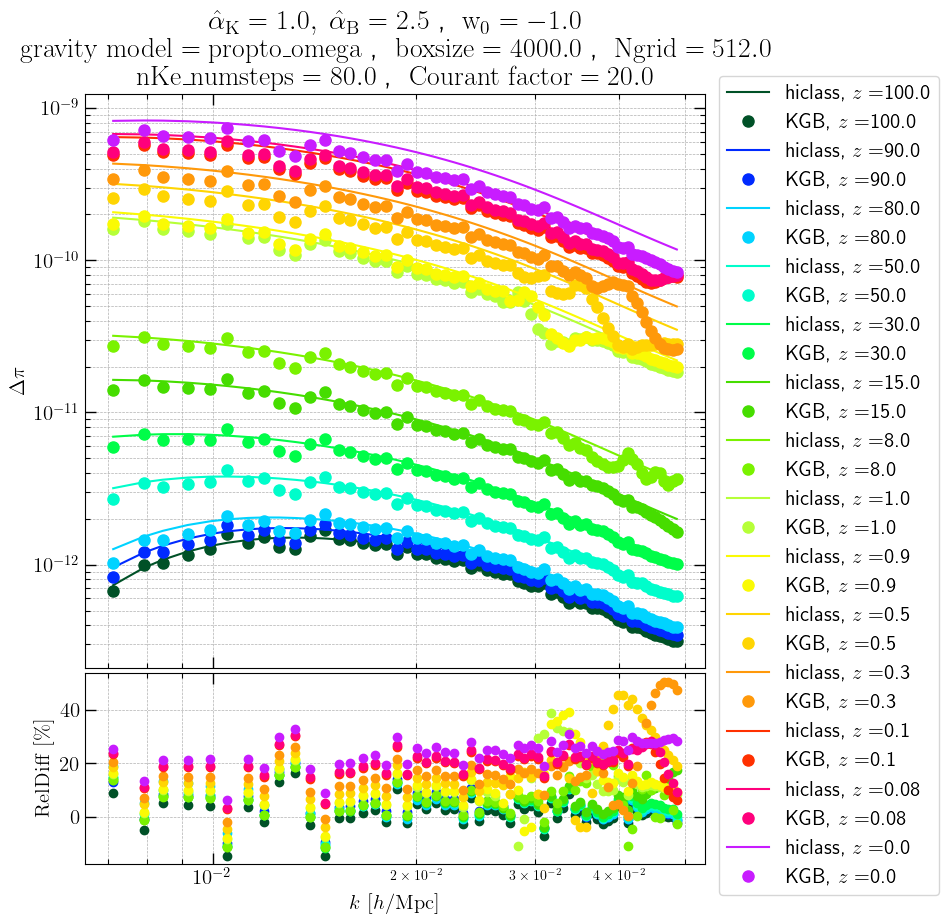

In [752]:
fig, ax = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(8, 10), sharex=True
)
plt.subplots_adjust(hspace=0.012, wspace=0.23)

plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}
# Normlization*(vx_smg)**2


# # ax.plot(k_pi[:460],PP_pi[:460],'o', label = "KGB, $z=100$")
# for i in range(np.shape(redshifts)[0]):
#     data["kgb_ev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
#         "./../impCluster/pk_00" + str(i) + "_pi_k.dat"
#     )
#     data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
#         "./../impCluster/pk_00" + str(i) + "_zeta.dat"
#     )
#     k = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 0]
#     pk = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 1]

#     ax.plot(
#         kk,
#         pk_pi7_hi[i] * H0 * H0 / ((kk) ** 2),
#         c=colors[i],
#         label="hiclass, $z=$" + str(redshifts[i]),
#     )
#     ax.plot(k[:460], pk[:460], "o", c=colors[i], label="KGB, $z=$" + str(redshifts[i]))

for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit

    # Load data using the formatted `file_index`
    data["kgb_ev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_pi_k.dat"
    )
    data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_zeta.dat"
    )
    k = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 0]
    pk = data["kgb_ev"]["pi"]["z=" + str(redshifts[i])][:, 1]

    ax[0].plot(
        kk[8:70],
        pk_pi7_hi[i][8:70] * H0 * H0 / ((kk[8:70]) ** 2),"-",
        c=colors[i],
        label="hiclass, $z=$" + str(redshifts[i]),
        markersize=6
    )
    ax[0].plot(
        k[8:70], pk[8:70], "o", c=colors[i], label="KGB, $z=$" + str(redshifts[i]),
        markersize=8
    )
    ax[1].plot(
        k[8:70],
        (((pk_pi7_hi[i][8:70] * H0 * H0 / ((kk[8:70]) ** 2))
        - pk[8:70])/ (pk_pi7_hi[i][8:70] * H0 * H0 / ((kk[8:70]) ** 2)))*100,
        "o",
        c=colors[i],
        label="KGB, $z=$" + str(redshifts[i]),
    )


for i in range(2):
    ax[i].set_xscale("log")
    ax[i].set_xlabel("$k~ [h/\mathrm{Mpc}]$", fontsize=15)

    # plt.xlim(5.0e-5, 0.01)
    # plt.ylim(1.e-17,3.e-9)
    ax[i].grid(which="both", axis="both", linestyle="--", linewidth=0.5)

    ax[i].tick_params("both", length=8, width=1, which="major")
    ax[i].tick_params("both", length=3.5, width=0.8, which="minor")
    ax[i].tick_params(direction="in", which="major", labelsize=15)
    ax[i].tick_params(direction="in", which="minor")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")


ax[0].set_yscale("log")
ax[0].set_ylabel(r"$\Delta \pi$", fontsize=15)
ax[1].set_ylabel(r"$\mathrm{Rel Diff}~ [\%]$", fontsize=15)


ax[0].legend(
    fontsize=15,  # Font size
    loc="upper center",  # Place legend above the plot
    bbox_to_anchor=(1.2, 1.05),  # Position outside plot area (x, y relative to axes)
    ncol=1,  # Number of columns
)


# Escape underscores in the gravity_model string
gravity_model = parser.get("top", "gravity_model")
gravity_model = gravity_model.replace("_", r"\_")

ax[0].set_title(
    rf"$\hat{{\alpha}}_{{\mathrm{{K}}}} = {alpha_K_hat},\ \hat{{\alpha}}_{{\mathrm{{B}}}} = {alpha_B_hat}$"
    + "~,~~"
    rf"$\mathrm{{w_0}} = \mathrm{{{w0}}}$"
    + "\n"
    + rf"$\mathrm{{gravity\ model}} = \mathrm{{{gravity_model}}}$"
    + "~,~~"
    rf"$\mathrm{{boxsize}} = \mathrm{{{boxsize}}}$" + "~,~~"
    rf"$\mathrm{{Ngrid}} = \mathrm{{{Ngrid}}}$"
    + "\n"
    + rf"$\mathrm{{nKe\_numsteps}} = \mathrm{{{nKe_numsteps}}}$"
    + "~,~~"
    rf"$\mathrm{{Courant~factor}} = \mathrm{{{Courant_factor}}}$",
    fontsize=20,
)


plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 15}

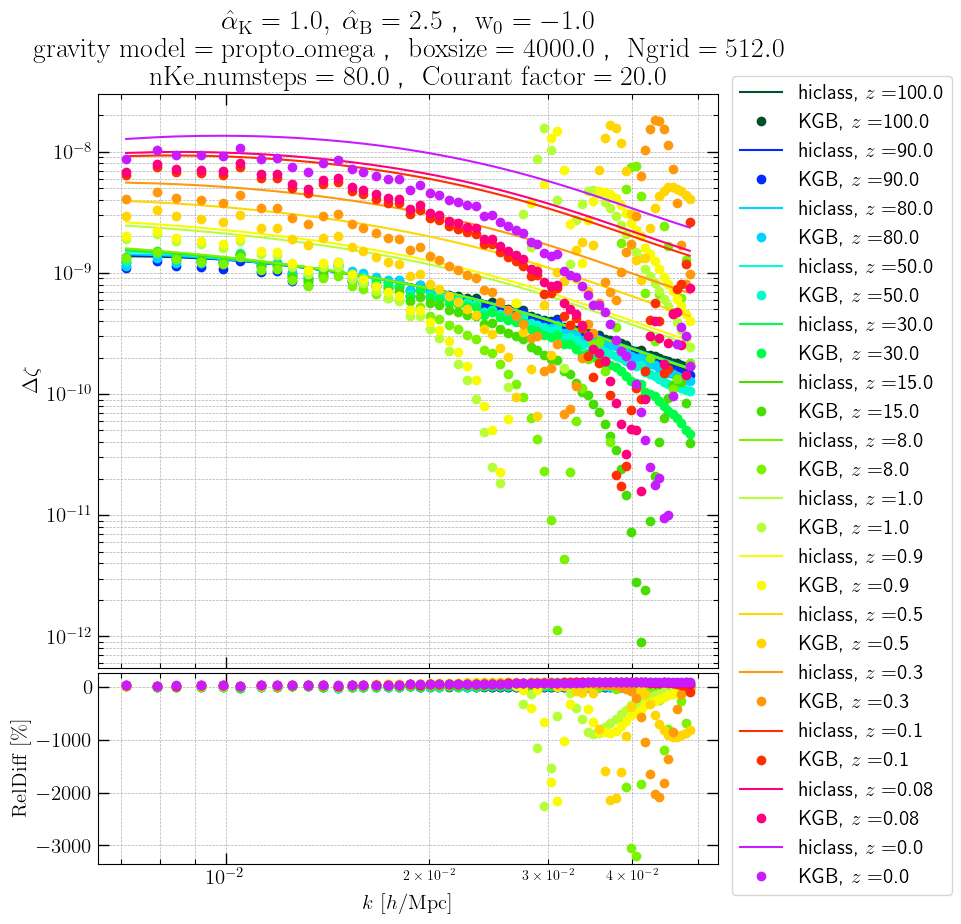

In [755]:
fig, ax = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(8, 10), sharex=True
)
plt.subplots_adjust(hspace=0.012, wspace=0.23)
plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 18}
# Normlization*(vx_smg)**2


# ax.plot(k_pi[:460],PP_pi[:460],'o', label = "KGB, $z=100$")
for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_zeta.dat"
    )
    k = data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])][:, 0]
    pk = data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])][:, 1]

    ax[0].plot(kk[8:70], pk_zeta_hi[i][8:70], c=colors[i], label="hiclass, $z=$" + str(redshifts[i]))
    ax[0].plot(k[8:70], pk[8:70], "o", c=colors[i], label="KGB, $z=$" + str(redshifts[i]))
    ax[1].plot(
        k[8:70],
        ((pk_zeta_hi[i][8:70]- pk[8:70])/ pk_zeta_hi[i][8:70])*100,
        "o",
        c=colors[i],
        label="KGB, $z=$" + str(redshifts[i]),
    )


for i in range(2):
    ax[i].set_xscale("log")
    ax[i].set_xlabel("$k~ [h/\mathrm{Mpc}]$", fontsize=15)

    # plt.xlim(5.0e-5, 0.01)
    # plt.ylim(1.e-17,3.e-9)
    ax[i].grid(which="both", axis="both", linestyle="--", linewidth=0.5)

    ax[i].tick_params("both", length=8, width=1, which="major")
    ax[i].tick_params("both", length=3.5, width=0.8, which="minor")
    ax[i].tick_params(direction="in", which="major", labelsize=15)
    ax[i].tick_params(direction="in", which="minor")
    ax[i].yaxis.set_ticks_position("both")
    ax[i].xaxis.set_ticks_position("both")


ax[0].set_yscale("log")
ax[0].set_ylabel(r"$\Delta \zeta$", fontsize=15)
ax[1].set_ylabel(r"$\mathrm{Rel Diff}~ [\%]$", fontsize=15)


ax[0].legend(
    fontsize=15,  # Font size
    loc="upper center",  # Place legend above the plot
    bbox_to_anchor=(1.2, 1.05),  # Position outside plot area (x, y relative to axes)
    ncol=1,  # Number of columns
)


ax[0].set_title(
    rf"$\hat{{\alpha}}_{{\mathrm{{K}}}} = {alpha_K_hat},\ \hat{{\alpha}}_{{\mathrm{{B}}}} = {alpha_B_hat}$"
    + "~,~~"
    rf"$\mathrm{{w_0}} = \mathrm{{{w0}}}$"
    + "\n"
    + rf"$\mathrm{{gravity\ model}} = \mathrm{{{gravity_model}}}$"
    + "~,~~"
    rf"$\mathrm{{boxsize}} = \mathrm{{{boxsize}}}$" + "~,~~"
    rf"$\mathrm{{Ngrid}} = \mathrm{{{Ngrid}}}$"
    +"\n" + rf"$\mathrm{{nKe\_numsteps}} = \mathrm{{{nKe_numsteps}}}$" + "~,~~"
    rf"$\mathrm{{Courant~factor}} = \mathrm{{{Courant_factor}}}$",
    fontsize=20,
)


plt.rc("text", usetex=True)
font = {"family": "normal", "weight": "bold", "size": 15}

#save_fig("zeta6")

In [358]:
Pk_alphaB = []
Pk_LCDM = []

for k in kk:
    Pk_alphaB.append(M_lin7_hi.pk(k*h,0)*h**3)
    Pk_LCDM.append(M_lin4_hi.pk(k*h,0)*h**3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$k \\,\\,\\,  \\mathrm{[h/Mpc]}$')

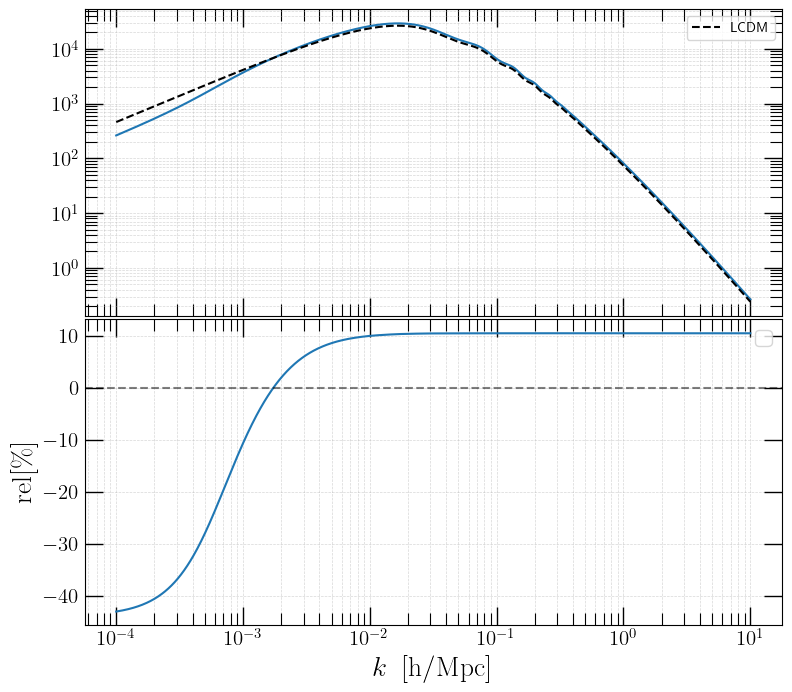

In [359]:
plt.rc("text", usetex=True)
font = {"family": "normal", "size": 15}

cmap = plt.get_cmap('Blues')
blue_colors = [cmap((i + 1) / 6) for i in range(6)]

fig, axs = plt.subplots(2, 1, figsize=(9, 8), sharex=True)
plt.subplots_adjust(hspace=0.012, wspace=0.0)

# ax.plot(k_pi[:460],PP_pi[:460],'o', label = "KGB, $z=100$")


# data["kgb_ev"]["delta"]["z=" + str(redshifts[i])] = np.loadtxt(
#     "./../imp/pk_00" + str(i) + "_delta.dat"
# )
# k = data['kgb_ev']['delta']['z=1'][:,0]
# pk = data['kgb_ev']['delta']['z=1'][:,1]

# Pk_m = []
# for i in range (0,len(k)):
#     Pk_m.append(pk[i]*(2*(np.pi)**2)/((k[i])**3))
    

#     ax[0].plot(k[:460],Pk_m[:460],'o', c = colors[i], label = "KGB, $z=$"+str(redshifts[i]))


axs[0].plot(kk, Pk_alphaB, linestyle="-")

axs[1].plot(
    kk,
    ((np.array(Pk_alphaB) / Pk_LCDM) - 1) * 100,
    linestyle="-"
)

    

#axs[0].plot(kk, Pk_kess, linestyle="-", color="orange",label="k-essence")

axs[0].plot(kk, Pk_LCDM, linestyle="--", color="black", label="LCDM")   
axs[1].axhline(0, color='black', linestyle='--', alpha= 0.5)

for i in range(2):

    axs[i].tick_params("both", length=13, width=1, which="major")
    axs[i].tick_params("both", length=8.5, width=0.8, which="minor")
    axs[i].tick_params(direction="in", which="major", labelsize=15)
    axs[i].tick_params(direction="in", which="minor")
    axs[i].yaxis.set_ticks_position("both")
    axs[i].xaxis.set_ticks_position("both")
    axs[i].set_xscale("log")
    axs[i].grid()
    axs[i].grid(which="both", axis="both", linestyle="--", linewidth=0.5, alpha=0.5)
    axs[i].legend()

axs[0].set_yscale("log")
axs[1].legend(fontsize=15, ncol=2)

axs[1].set_ylabel(r"${\mathrm{rel}[\%]}$", fontsize=20)
axs[1].set_xlabel(r"$k \,\,\,  \mathrm{[h/Mpc]}$", fontsize=20)

In [451]:
for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    data["kgb_ev"]["delta"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name}/pk_0{file_index}_delta.dat"
    )
    k = data["kgb_ev"]["delta"]["z=" + str(redshifts[i])][:, 0]
    pk = data["kgb_ev"]["delta"]["z=" + str(redshifts[i])][:, 1]

In [452]:
Pk_m = []
for i in range (0,len(k)):
    Pk_m.append(pk[i]*(2*(np.pi)**2)/((k[i])**3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$k \\,\\,\\,  \\mathrm{[h/Mpc]}$')

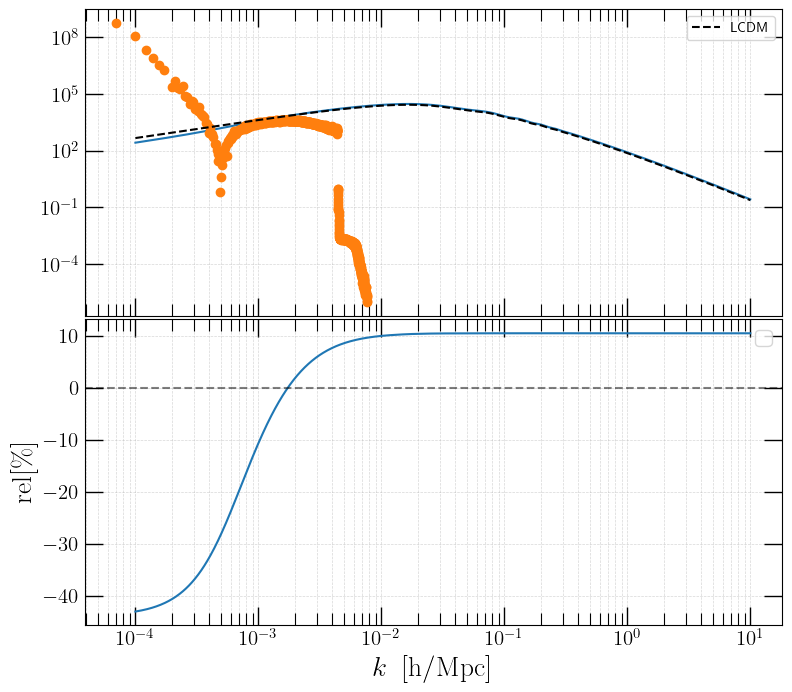

In [453]:
plt.rc("text", usetex=True)
font = {"family": "normal", "size": 15}

cmap = plt.get_cmap('Blues')
blue_colors = [cmap((i + 1) / 6) for i in range(6)]

fig, axs = plt.subplots(2, 1, figsize=(9, 8), sharex=True)
plt.subplots_adjust(hspace=0.012, wspace=0.0)

# ax.plot(k_pi[:460],PP_pi[:460],'o', label = "KGB, $z=100$")


# data["kgb_ev"]["delta"]["z=" + str(redshifts[i])] = np.loadtxt(
#     "./../imp/pk_00" + str(i) + "_delta.dat"
# )
# k = data['kgb_ev']['delta']['z=1'][:,0]
# pk = data['kgb_ev']['delta']['z=1'][:,1]

# Pk_m = []
# for i in range (0,len(k)):
#     Pk_m.append(pk[i]*(2*(np.pi)**2)/((k[i])**3))
    

#     ax[0].plot(k[:460],Pk_m[:460],'o', c = colors[i], label = "KGB, $z=$"+str(redshifts[i]))


axs[0].plot(kk, Pk_alphaB, linestyle="-")
axs[0].plot(k, Pk_m, "o")

axs[1].plot(
    kk,
    ((np.array(Pk_alphaB) / Pk_LCDM) - 1) * 100,
    linestyle="-"
)

    

#axs[0].plot(kk, Pk_kess, linestyle="-", color="orange",label="k-essence")

axs[0].plot(kk, Pk_LCDM, linestyle="--", color="black", label="LCDM")   
axs[1].axhline(0, color='black', linestyle='--', alpha= 0.5)

for i in range(2):

    axs[i].tick_params("both", length=13, width=1, which="major")
    axs[i].tick_params("both", length=8.5, width=0.8, which="minor")
    axs[i].tick_params(direction="in", which="major", labelsize=15)
    axs[i].tick_params(direction="in", which="minor")
    axs[i].yaxis.set_ticks_position("both")
    axs[i].xaxis.set_ticks_position("both")
    axs[i].set_xscale("log")
    axs[i].grid()
    axs[i].grid(which="both", axis="both", linestyle="--", linewidth=0.5, alpha=0.5)
    axs[i].legend()

axs[0].set_yscale("log")
axs[1].legend(fontsize=15, ncol=2)

axs[1].set_ylabel(r"${\mathrm{rel}[\%]}$", fontsize=20)
axs[1].set_xlabel(r"$k \,\,\,  \mathrm{[h/Mpc]}$", fontsize=20)